In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/df_0.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,369,370,371,372,373,374,375,376,377,378
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500.0
2,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000.0
4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000.0


In [3]:
X = df.values[:, :-1]
y = df.values[:, -1]
X.shape, y.shape

((2919, 379), (2919,))

In [4]:
train_idx = 1460
X_train, X_test = X[:train_idx], X[train_idx:]
y_train, y_test = y[:train_idx], y[train_idx:]

In [5]:
train_train_idx = int(train_idx * 0.7)
X_train_train, X_train_test = X_train[:train_train_idx], X_train[train_train_idx:]
y_train_train, y_train_test = y_train[:train_train_idx], y_train[train_train_idx:]

# Train XGB

In [6]:
reg = xgb.XGBRegressor(
    tree_method="hist",
    eval_metric=mean_squared_error,
)
reg.fit(X_train_train, y_train_train, eval_set=[(X_train_test, y_train_test)], verbose=True)

[0]	validation_0-rmse:143072.77434	validation_0-mean_squared_error:20469817344.00000
[1]	validation_0-rmse:105747.88433	validation_0-mean_squared_error:11182615552.00000
[2]	validation_0-rmse:81446.69445	validation_0-mean_squared_error:6633564160.00000
[3]	validation_0-rmse:64925.67684	validation_0-mean_squared_error:4215343616.00000
[4]	validation_0-rmse:54462.98178	validation_0-mean_squared_error:2966216448.00000
[5]	validation_0-rmse:47427.09570	validation_0-mean_squared_error:2249329664.00000
[6]	validation_0-rmse:42217.05424	validation_0-mean_squared_error:1782279680.00000
[7]	validation_0-rmse:39141.11785	validation_0-mean_squared_error:1532027136.00000
[8]	validation_0-rmse:37186.11934	validation_0-mean_squared_error:1382807552.00000
[9]	validation_0-rmse:35079.30936	validation_0-mean_squared_error:1230557952.00000
[10]	validation_0-rmse:33884.12962	validation_0-mean_squared_error:1148134272.00000
[11]	validation_0-rmse:32928.15206	validation_0-mean_squared_error:1084263168.0000

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7f8684ca6a70>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

MSE 922,242,926


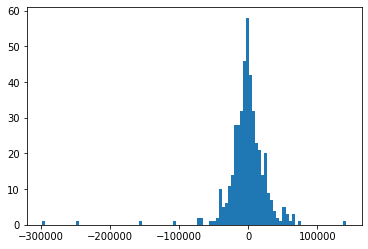

In [7]:
# evaluate the model
y_pred = reg.predict(X_train_test)
print("MSE", f"{mean_squared_error(y_train_test, y_pred):,.0f}")
plt.hist(y_pred - y_train_test, bins=100)
plt.show()

In [8]:
for i in np.random.randint(0, X_train_test.shape[0], 10):
    p = reg.predict(X_train_test[i:i+1])
    print(f"Predicted: {p[0]:,.0f}\t", f"Actual: {y_train_test[i]:,.0f}\t", f"Difference: {p[0] - y_train_test[i]:,.0f}")

Predicted: 254,028	 Actual: 215,000	 Difference: 39,028
Predicted: 243,677	 Actual: 230,000	 Difference: 13,677
Predicted: 164,832	 Actual: 163,900	 Difference: 932
Predicted: 180,065	 Actual: 174,500	 Difference: 5,565
Predicted: 148,915	 Actual: 155,900	 Difference: -6,985
Predicted: 299,123	 Actual: 315,000	 Difference: -15,877
Predicted: 272,981	 Actual: 274,300	 Difference: -1,319
Predicted: 220,523	 Actual: 215,000	 Difference: 5,523
Predicted: 128,648	 Actual: 133,000	 Difference: -4,352
Predicted: 231,884	 Actual: 274,725	 Difference: -42,841


# Train Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
lm = LinearRegression()
lm.fit(X_train_train, y_train_train, regu)

# evaluate the model
y_pred = lm.predict(X_train_test)
print("MSE", f"{mean_squared_error(y_train_test, y_pred):,.0f}")

MSE 2,113,208,088


In [11]:
lm.score(X_train_test, y_train_test)

0.6558110512864359